In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA

In [4]:
train_Path = "/content/customer_churn_dataset-training-master[1].csv"
test_Path = "/content/customer_churn_dataset-testing-master[1].csv"

train_data = pd.read_csv(train_Path)
test_data = pd.read_csv(test_Path)
train_data = train_data.dropna()
test_data = test_data.dropna()

class_0 = train_data[train_data['Churn'] == 0]
class_1 = train_data[train_data['Churn'] == 1]
resampled_classes = class_1.sample(n=len(class_0), random_state=42).sample(frac=1).reset_index(drop=True)
train_data = pd.concat([resampled_classes, class_0], axis=0).sample(frac=1).reset_index(drop=True)

y_Train = train_data['Churn']
y_Test = test_data['Churn']
x_Train = train_data.drop('Churn', axis=1)
x_Test = test_data.drop('Churn', axis=1)

In [5]:
x_Train = pd.get_dummies(x_Train, columns=['Gender', 'Subscription Type', 'Contract Length'])
x_Test = pd.get_dummies(x_Test, columns=['Gender', 'Subscription Type', 'Contract Length'])

scaler = StandardScaler()
x_Train = scaler.fit_transform(x_Train)
x_Test = scaler.transform(x_Test)

pca = PCA(n_components=7)  # Reduce to 2 principal components
x_Train = pca.fit_transform(x_Train)
x_Test = pca.fit_transform(x_Test)

In [6]:
#Logestic_Regretion = LogisticRegression(class_weight='balanced', max_iter=10000, random_state=42)
#Random_Forest = RandomForestClassifier(class_weight='balanced', random_state=42)
XGB = xgb.XGBClassifier(scale_pos_weight=np.sum(y_Train==0)/np.sum(y_Train==1), use_label_encoder=False, eval_metric='logloss')
#LGBM = LGBMClassifier(scale_pos_weight=len(class_0)/len(class_1))

In [7]:
#Logestic_Regretion.fit(x_Train, y_Train)
#Random_Forest.fit(x_Train, y_Train)
XGB.fit(x_Train, y_Train, verbose=False)
#LGBM.fit(x_Train, y_Train)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [12:47:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [9]:
#y_Predited_LR = Logestic_Regretion.predict(x_Test)
#y_Predited_RF = Random_Forest.predict(x_Test)
xgb_pred = XGB.predict(x_Test)
#lgbm_pred = LGBM.predict(x_Test)

              precision    recall  f1-score   support

           0       0.40      0.17      0.24     33881
           1       0.44      0.72      0.54     30493

    accuracy                           0.43     64374
   macro avg       0.42      0.45      0.39     64374
weighted avg       0.42      0.43      0.38     64374



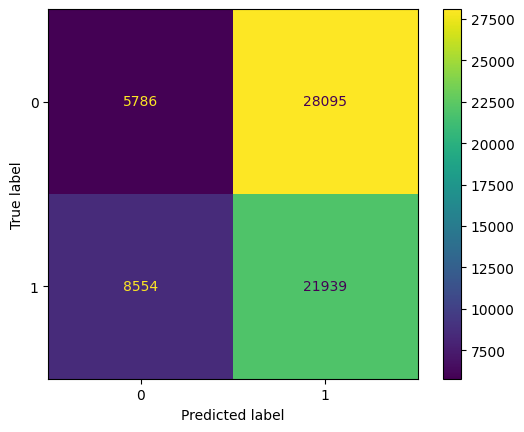

In [11]:
cm_xgb = confusion_matrix(y_Test, xgb_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb)
disp.plot()
print(classification_report(y_Test, xgb_pred))